In [1]:
from faker import Faker
import numpy.random as npr
from dataclasses import dataclass
import numpy as np
from datetime import datetime
from time import sleep
from matplotlib import pyplot as plt

# Лабораторная работа №2

## Вариант 12.

In [2]:
sizes = (100, 500, 1000, 5000, 10000, 30000, 100000)

### 1.  Генератор

In [3]:
clubsList = ("Россия Спартак-Владикавказ Владикавказ ",
"Россия Рубин Казань ",
"Россия Сочи Сочи ",
"Россия Енисей Красноярск ",
"Россия Звезда Пермь ",
"Россия Балтика Калининград ",
"Россия СКА-Хабаровск Хабаровск ",
"Россия Салют Белгород ",
"Россия Динамо Брянск ",
"Россия Торпедо Владимир ",
"Россия Ротор-Волгоград Волгоград ",
"Россия Факел Воронеж ",
"Россия Металлург Липецк ",
"Россия Химки Химки ",
"Россия Сибирь Новосибирск ",
"Россия Авангард Курск ",
"Россия Ростов Ростов ",
"Россия Крылья-советов Самара ",
"Россия Сокол Саратов ",
"Россия Урал Екатеренбург ",
"Россия Днепр Смоленск ",
"Россия Шинник Ярославль ",
"Россия Динамо  Москва ",
"Россия Зенит Санкт-Петербург ",
"Россия ЦСКА Москва ",
"Россия Спартак Москва ",
"Россия Локомотив Москва ",
"Украина Шахтер Донецк ",
"Украина Динамо Киев ",
"Украина Заря Луганск ",
"Украина Десна Чернигов ",
"Украина Кривбасс Кривой-Рог ",
"Украина Днепр Днепропетровск ",
"Украина Верес Львов ",
"Украина Звезда Кировоград ",
"Украина Черноморец Одесса ",
"Украина Оболонь Киев ",
"Украина Металлист Харьков ",
"Украина Нефтяник-Укрнефть Ахтырка ",
"Украина Сталь Алчевск ",
"Украина Арсенал Киев ",
"Украина Олимпик Донецк ",
"Украина Металлург Донецк ",
"Украина Львов Львов ",
"Украина Металлург Запорожье ",
"Украина Карпаты Львов ",
"Украина Волынь Луцк ",
"Украина Ворскла Полтава ",
"Украина Харьков Харьков ",
"Украина Говерла-Закарпатье Ужгород ")
fake = Faker('ru_RU')  
for size in sizes:
    with open(f'arrays/array{size}.txt', 'w') as file:
        for _ in range(size):
            # Генерация файла с клубами
            file.write('{} {} {} {} {} {}\n'.format(
                # Выбор одного из клубов из заготовленного списка
                npr.choice(clubsList),
                # Случайный год в диапазоне [1955, 2020)
                str(npr.randint(1955, 2020)), 
                # Случаяная фамилия
                fake.last_name_male(),
                # Случайное имя
                fake.first_name_male(),
                # Случайное отчество
                fake.middle_name_male(),
                # Случайное количество очков от 0 до 65
                str(npr.randint(0, 66))
            ))
        print(f'{size}: ready')

100: ready
500: ready
1000: ready
5000: ready
10000: ready
30000: ready
100000: ready


### 2. Создание класса и перегрузка его операторов

In [4]:
@dataclass
class Club:
    clubCountry: str
    clubName: str
    clubCity: str
    clubYear: str
    coachName: str
    clubResult: str
    
    # Перегрузка оператора '>'
    def __gt__(self, other):
        if int(self.clubYear) > int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry > other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) > int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName > other.clubName:
                        return True
        return False
    
    # Перегрузка оператора '>='
    def __ge__(self, other):
        if int(self.clubYear) >= int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry >= other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) >= int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName >= other.clubName:
                        return True
        return False   
    
    # Перегрузка оператора '<'
    def __lt__(self, other):
        if int(self.clubYear) < int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry < other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) < int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName < other.clubName:
                        return True
        return False
    
    # Перегрузка оператора '<='
    def __le__(self, other):
        if int(self.clubYear) <= int(other.clubYear):
            return True
        elif int(self.clubYear) == int(other.clubYear):
            if self.clubCountry <= other.clubCountry:
                return True
            elif self.clubCountry == other.clubCountry:
                if int(self.clubResult) <= int(other.clubResult):
                    return True
                elif int(self.clubResult) == int(other.clubResult):
                    if self.clubName <= other.clubName:
                        return True
        return False
     
    # Создание метода для перевода класса в тип String    
    def toStr(self):
        return ' '.join(self.__dict__.values())   


### 3. Создание неотсортированных масивов

In [5]:


clubs = np.empty(len(sizes), dtype=np.ndarray)
for i, size in enumerate(sizes):
    with open(f'arrays/array{size}.txt') as arr:
        clubs[i] = np.empty(size, dtype=Club)
        for j, string in enumerate(arr.read()[:-1].split('\n')):
            data = string.split()
            clubs[i][j] = Club(
                clubCountry = data[0],
                clubName = data[1],
                clubCity = data[2],
                clubYear = data[3],
                coachName = ' '.join(data[4:7]),
                clubResult = data[7]
            )

### 4. Описание алгоритма пирамидальной сортировки

Пирамидальная сортировка была самой быстрой из всех представленных, поэтому в этом задании я буду использовать именно ее

In [6]:
def heapify(data, n, i):  
    """Пирамидальная сортировка:
    Метод heapify для восстановления основного свойства кучи
    heapify(data, n, i) -> None
    data -- Массив данных 
    n -- правая граница массива
    i -- левая граница массива
    """
    # Иницилизируем корень и дочерние элементы
    largest = i                             
    l = 2 * i + 1                                                            
    r = 2 * i + 2      
    # Проверяем существует ли левый дочерний элемент больший, чем корень
    if l < n and data[i] < data[l]:         
        largest = l                 
    # Проверяем существует ли правый дочерний элемент больший, чем корень                                            
    if r < n and data[largest] < data[r]:   
        largest = r      
    # Если корень меньше чем какой либо из дочерних элементов, меняем корень и элементы местами    
    if largest != i                        :
        data[i],data[largest] = data[largest],data[i]    
        # Применяем heapify к корню.
        heapify(data, n, largest)               
def heapSort(data):  
    """Пирамидальная сортировка:
    Основная функция
    heapSort(data) -> data
    data -- Массив данных 
    """
    n = len(data)    
    # Строим max-heap.
    for i in range(n, -1, -1):              
        heapify(data, n, i)   
    # По очереди вынимаем максимальные элементы и помещаем в массив
    for i in range(n-1, 0, -1):            
        data[i], data[0] = data[0], data[i]                                  
        heapify(data, i, 0)         
    # Возвращаем отсортированный массив
    return data                         

### 5. Сортировка масивов

In [7]:
for i, size in enumerate(sizes):
    clubsCopy = clubs[i].copy()   
    clubsSorted = heapSort(clubsCopy)
            
    with open(f'heap/heap{size}.txt', 'w') as file:
         file.write('\n'.join(map(' '.join, map(lambda e: e.__dict__.values(), clubsSorted))))
    print(f'{size}: ready')       

100: ready
500: ready
1000: ready
5000: ready
10000: ready
30000: ready
100000: ready


### 6. Создание отсортированных масивов

In [8]:
clubsSorted = {}
for i, size in enumerate(sizes):
    with open(f'heap/heap{size}.txt') as arr:
        clubsSorted[i] = np.empty(size, dtype=Club)
        for j, string in enumerate(arr.read()[:-1].split('\n')):
            data = string.split()
            clubsSorted[i][j] = Club(
                clubCountry = data[0],
                clubName = data[1],
                clubCity = data[2],
                clubYear = data[3],
                coachName = ' '.join(data[4:7]),
                clubResult = data[7]
            )

### 7. Линейный поиск

In [9]:
def linearSearch(array, x):                         
    """Прямой(линейный) поиск
    linearSearch(array, x) -> index
    array - массив
    x - искомый элемент
    index - индекс элемента
    """
    for index, element in enumerate(array):         
        if element == x:                           
            return index
    # Если элемент не был найден ничего не возвращает
    return None                                     

### 8. Бинарный поиск

In [10]:
def binarySearch(array, x):                         
    """Бинарный поиск
    binarySearch(array, x) -> index
    array - массив
    x - искомый элемент
    index - индекс элемента
    """
    # Устанавливаем границы и середину поиска
    left = 0                                        
    right = len(array) - 1                          
    middle = right // 2   
    # Меняем границы нашего поиска до тех пор, пока искомый элемент не будет находится
    # в середине нашего поиска
    while array[middle] != x and left < right:  
        if x > array[middle]:                       
            left = middle + 1                        
        else:                                       
            right = middle - 1                      
        middle = (left+right) // 2   
    # Если элемент так и не был найден, функция ничего не возвращает
    if left > right:                                
        return None   
    # Иначе возвращает индекс элемента
    else:                                           
        return middle                                

### 9. Multimap

In [20]:
def multimapCreation(array):
    """Функция для создания multimap
    multimapCreation(array) -> dict
    array - массив данных
    dict - словарь ключ: значение    
    """
    keys = map(lambda x: x.toStr(),array)
    multimap = zip(keys, array)           
    return dict(multimap)         

### 10. Реализация поисков

In [60]:
linearTiming = []
binaryTiming = []
sortBinaryTiming = []
keyTiming = []
for i, size in enumerate(sizes):
    clubsSortedCopy = clubsSorted[i].copy()
    randomKey = clubsSortedCopy[np.random.randint(size)]
    print(f'\nРазмер: {size}.\tЗапись:', randomKey.toStr()) 
    
    linearTime = datetime.now() - datetime.now()
    binaryTime = datetime.now() - datetime.now()
    for _ in range(400):
        check = datetime.now()
        linearSearch(clubsSortedCopy, randomKey)
        linearTime += datetime.now() - check

        check = datetime.now()
        binarySearch(clubsSortedCopy, randomKey)
        binaryTime += datetime.now() - check
    
    linearTime /= 400
    binaryTime /= 400
    linearTiming.append(linearTime.microseconds)
    binaryTiming.append(binaryTime.microseconds)
    print(f'Прямой поиск.\t\t\t{linearTime}')
    print(f'Бинарный поиск.\t\t\t{binaryTime}')
    
    clubsCopy = clubs[i].copy()
    check = datetime.now()
    binarySearch(heapSort(clubsCopy), randomKey)
    check = datetime.now() - check
    sortBinaryTiming.append(check.microseconds)
    print(f'Сортировка и бинарный поиск.\t{check}')   
    
    keyTime = datetime.now() - datetime.now()
    multimap = multimapCreation(clubsCopy)
    for _ in range(4000):
        check = datetime.now()
        multimap[randomKey.toStr()]
        keyTime += datetime.now() - check
    keyTime /= 4000
    keyTiming.append(keyTime.microseconds)
    print(f'Поиск по ключу.\t\t\t{keyTime}')
   


Размер: 100.	Запись: Россия Днепр Смоленск 2011 Щукин Филимон Елисеевич 26
Прямой поиск.			0:00:00.000047
Бинарный поиск.			0:00:00.000018
Сортировка и бинарный поиск.	0:00:00.001997
Поиск по ключу.			0:00:00.000001

Размер: 500.	Запись: Россия Крылья-советов Самара 1975 Игнатьев Добромысл Ефимьевич 58
Прямой поиск.			0:00:00.000093
Бинарный поиск.			0:00:00.000030
Сортировка и бинарный поиск.	0:00:00.009977
Поиск по ключу.			0:00:00

Размер: 1000.	Запись: Россия Локомотив Москва 1989 Овчинников Мирон Евстигнеевич 46
Прямой поиск.			0:00:00.000299
Бинарный поиск.			0:00:00.000022
Сортировка и бинарный поиск.	0:00:00.021939
Поиск по ключу.			0:00:00.000001

Размер: 5000.	Запись: Россия СКА-Хабаровск Хабаровск 1978 Беспалов Софон Якубович 41
Прямой поиск.			0:00:00.001060
Бинарный поиск.			0:00:00.000040
Сортировка и бинарный поиск.	0:00:00.151561
Поиск по ключу.			0:00:00.000001

Размер: 10000.	Запись: Украина Сталь Алчевск 1996 Никифоров Харитон Фокич 24
Прямой поиск.			0:00:00.003895

### 11. Построение графиков

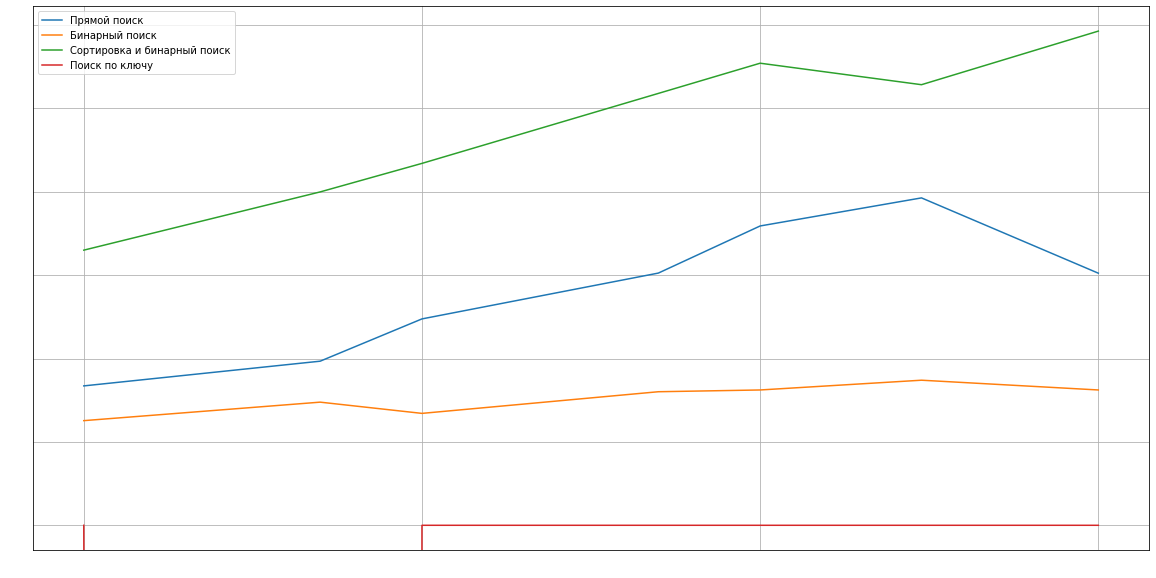

In [61]:
plt.rc(('xtick', 'ytick'), color='white')
plt.figure(figsize=(20, 10))
plt.plot(sizes, linearTiming, label='Прямой поиск')
plt.plot(sizes, binaryTiming, label='Бинарный поиск')
plt.plot(sizes, sortBinaryTiming, label='Сортировка и бинарный поиск')
plt.plot(sizes, keyTiming, label='Поиск по ключу')
plt.grid()
plt.legend()
plt.xscale('log')
plt.yscale('log')

Из графика видно, что самым эффективным является поиск с помощью MultiMap, затем Бинарный, за ним Линейный и самым медленным является Бинарный с сортировкой